In [107]:
'''
APC 523 - PSet 1
Sam Moore
Collaboration: None
'''

'\nAPC 523 - PSet 1\nSam Moore\nCollaboration: None\n'

In [108]:
import math
from math import log10, floor
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import newton
import sympy

In [109]:
'''
round_sig(x, s):
Returns a number to s significant figures
Note that I assume that machine epsilon of my computer remains
sufficiency low as ot not affect the calculations in the
following problems (at 5 sf).

An alternative method with less error (but rather ugly)
could be as follows:

def round_sig(x,s)
    if (0.0 < x < 1.0):
        round(x, s)
    if (1.0 < x < 10.0):
        round(x, s+1)
    if (10.0 < x < 100.0):
        round(x, s+2)
        
and so on, knowing that (by inspection) in the following problems,
the number rounded is always < 1000.
'''

def round_sig(x, s):
    if (x != 0):
        return round(x, s - int(floor(log10(abs(x))))-1)
    else:
        return 0

Question 1:

See attached page.

In [110]:
'''
Question 2a, b, c:
'''

def e_series_term(x, n):
    numerator = 1
    denominator = 1
    for i in range(n):
        numerator *= x
        denominator *= n-i
        numerator = round_sig(numerator, 5)
        denominator = round_sig(denominator, 5)
    series_term = round(numerator/denominator,5)
    return series_term

def e_series_sum_LtR(x,n):
    summation = 0
    for i in range(n):
        summation += e_series_term(x,i)
        summation = round_sig(summation, 5)
        actual = math.exp(x)
        rel_error = (abs((actual-summation) / actual))*100
        print('i= '+str(i)+', sum = '+str(summation)+', rel_err = '+str(rel_error)+'%')
    return summation, rel_error

def e_series_sum_RtL(x,n):
    summation = 0
    for i in reversed(range(n)):
        summation += e_series_term(x,i)
        summation = round_sig(summation, 5)
        actual = math.exp(x)
        rel_error = (abs((actual-summation) / actual))*100
        print('i= '+str(i)+' sum = ' + str(summation)+', rel_err = '+str(rel_error)+'%')
    return summation, rel_error

print('Series Terms:')
for i in range(31):
    print('i = '+str(i)+': '+str(e_series_term(5.5, i)))
#e_series_sum(5.5, 31)

Series Terms:
i = 0: 1.0
i = 1: 5.5
i = 2: 15.125
i = 3: 27.73
i = 4: 38.12875
i = 5: 41.94167
i = 6: 38.44722
i = 7: 30.20833
i = 8: 20.76835
i = 9: 12.6918
i = 10: 6.98054
i = 11: 3.49033
i = 12: 1.59971
i = 13: 0.67682
i = 14: 0.26586
i = 15: 0.09749
i = 16: 0.03351
i = 17: 0.01084
i = 18: 0.00331
i = 19: 0.00096
i = 20: 0.00026
i = 21: 7e-05
i = 22: 2e-05
i = 23: 0.0
i = 24: 0.0
i = 25: 0.0
i = 26: 0.0
i = 27: 0.0
i = 28: 0.0
i = 29: 0.0
i = 30: 0.0


In [111]:
e_series_sum_LtR(5.5, 31)

i= 0, sum = 1.0, rel_err = 99.5913228561536%
i= 1, sum = 6.5, rel_err = 97.34359856499836%
i= 2, sum = 21.625, rel_err = 91.16235676432144%
i= 3, sum = 49.355, rel_err = 79.8297395654606%
i= 4, sum = 87.484, rel_err = 64.24728874774097%
i= 5, sum = 129.43, rel_err = 47.10491727195958%
i= 6, sum = 167.88, rel_err = 31.391281091065242%
i= 7, sum = 198.09, rel_err = 19.045144575465294%
i= 8, sum = 218.86, rel_err = 10.556920297775422%
i= 9, sum = 231.55, rel_err = 5.370807342364523%
i= 10, sum = 238.53, rel_err = 2.518240878316608%
i= 11, sum = 242.02, rel_err = 1.0919576462926448%
i= 12, sum = 243.62, rel_err = 0.43807421613839637%
i= 13, sum = 244.3, rel_err = 0.160173758322837%
i= 14, sum = 244.57, rel_err = 0.04983092948431464%
i= 15, sum = 244.67, rel_err = 0.008963215099676295%
i= 16, sum = 244.7, rel_err = 0.0032970992157163714%
i= 17, sum = 244.71, rel_err = 0.007383870654188337%
i= 18, sum = 244.71, rel_err = 0.007383870654188337%
i= 19, sum = 244.71, rel_err = 0.0073838706541883

(244.71, 0.007383870654188337)

In [112]:
e_series_sum_RtL(5.5, 31)

i= 30 sum = 0, rel_err = 100.0%
i= 29 sum = 0, rel_err = 100.0%
i= 28 sum = 0, rel_err = 100.0%
i= 27 sum = 0, rel_err = 100.0%
i= 26 sum = 0, rel_err = 100.0%
i= 25 sum = 0, rel_err = 100.0%
i= 24 sum = 0, rel_err = 100.0%
i= 23 sum = 0, rel_err = 100.0%
i= 22 sum = 2e-05, rel_err = 99.99999182645712%
i= 21 sum = 9e-05, rel_err = 99.99996321905705%
i= 20 sum = 0.00035, rel_err = 99.99985696299966%
i= 19 sum = 0.00131, rel_err = 99.99946463294157%
i= 18 sum = 0.00462, rel_err = 99.99811191159543%
i= 17 sum = 0.01546, rel_err = 99.99368185135614%
i= 16 sum = 0.04897, rel_err = 99.97998708026584%
i= 15 sum = 0.14646, rel_err = 99.94014514551226%
i= 14 sum = 0.41232, rel_err = 99.83149424004925%
i= 13 sum = 1.0891, rel_err = 99.55490972263688%
i= 12 sum = 2.6888, rel_err = 98.9011488956258%
i= 11 sum = 6.1791, rel_err = 97.47474306045866%
i= 10 sum = 13.16, rel_err = 94.62180878698129%
i= 9 sum = 25.852, rel_err = 89.4348784772827%
i= 8 sum = 46.62, rel_err = 80.94747155388052%
i= 7 sum =

(244.71, 0.007383870654188337)

In [113]:
'''
Question 2d, i
'''

e_series_sum_LtR(-5.5, 31)

i= 0, sum = 1.0, rel_err = 24369.19322642204%
i= 1, sum = -4.5, rel_err = 110211.36951889918%
i= 2, sum = 10.625, rel_err = 259885.17803073418%
i= 3, sum = -17.105, rel_err = 418645.550137949%
i= 4, sum = 21.024, rel_err = 514340.318392297%
i= 5, sum = -20.918, rel_err = 511946.58391029615%
i= 6, sum = 17.529, rel_err = 428820.488065952%
i= 7, sum = -12.679, rel_err = 310344.9009178051%
i= 8, sum = 8.0894, rel_err = 197841.09168581845%
i= 9, sum = -4.6024, rel_err = 112717.0149052848%
i= 10, sum = 2.3781, rel_err = 58090.18841175425%
i= 11, sum = -1.1122, rel_err = 27314.636706426598%
i= 12, sum = 0.48751, rel_err = 11828.97638981301%
i= 13, sum = -0.18931, rel_err = 4732.262969693957%
i= 14, sum = 0.07655, rel_err = 1773.1167414826075%
i= 15, sum = -0.02094, rel_err = 612.3849061612775%
i= 16, sum = 0.01257, rel_err = 207.57775885612503%
i= 17, sum = 0.00173, rel_err = 57.668295718289876%
i= 18, sum = 0.00504, rel_err = 23.324733861167093%
i= 19, sum = 0.00408, rel_err = 0.16569163619

(0.00429, 4.972838941350567)

In [114]:
'''
Question 2d, ii
'''

e_series_sum_RtL(-5.5, 31)

i= 30 sum = 0, rel_err = 100.0%
i= 29 sum = 0, rel_err = 100.0%
i= 28 sum = 0, rel_err = 100.0%
i= 27 sum = 0, rel_err = 100.0%
i= 26 sum = 0, rel_err = 100.0%
i= 25 sum = 0, rel_err = 100.0%
i= 24 sum = 0, rel_err = 100.0%
i= 23 sum = 0, rel_err = 100.0%
i= 22 sum = 2e-05, rel_err = 99.51061613547155%
i= 21 sum = -5e-05, rel_err = 101.22345966132109%
i= 20 sum = 0.00021, rel_err = 94.86146942245138%
i= 19 sum = -0.00075, rel_err = 118.35189491981653%
i= 18 sum = 0.00256, rel_err = 37.35886534035957%
i= 17 sum = -0.00828, rel_err = 302.6049199147745%
i= 16 sum = 0.02523, rel_err = 517.3577451026281%
i= 15 sum = -0.07226, rel_err = 1868.143902541257%
i= 14 sum = 0.1936, rel_err = 4637.235808635307%
i= 13 sum = -0.48322, rel_err = 11924.00355087166%
i= 12 sum = 1.1165, rel_err = 27219.854237300213%
i= 11 sum = -2.3738, rel_err = 58184.970880880646%
i= 10 sum = 4.6067, rel_err = 112622.23243615842%
i= 9 sum = -8.0851, rel_err = 197935.87415494488%
i= 8 sum = 12.683, rel_err = 310242.77769

(0.004, 2.1232270943118334)

In [115]:
'''
Question 2d iii, iv
'''

# Left to Right
def func_2d3(x, n):
    positives = 0
    negatives = 0
    for i in range(n):
        if (i % 2 == 0):
            positives += e_series_term(x,i)
            positives = round_sig(positives, 5)
    for i in range(n):
        if (i % 2 == 1):
            negatives += e_series_term(x,i)
            negatives = round_sig(negatives, 5)

    e_value = positives + negatives
    e_value = round_sig(e_value, 5)
    actual = np.exp(x)
    rel_error = (abs((actual-e_value) / actual))*100
    return e_value, rel_error
    
# Right to Left
def func_2d4(x, n):
    positives = 0
    negatives = 0
    for i in reversed(range(n)):
        if (i % 2 == 0):
            positives += e_series_term(x,i)
            positives = round_sig(positives, 5)
    for i in reversed(range(n)):
        if (i % 2 == 1):
            negatives += e_series_term(x,i)
            negatives = round_sig(negatives, 5)

    e_value = positives + negatives
    e_value = round_sig(e_value, 5)
    actual = np.exp(x)
    rel_error = (abs((actual-e_value) / actual))*100
    return e_value, rel_error

x = -5.5
n = 31
e_value = func_2d3(x, n)
print(e_value)
e_value = func_2d4(x, n)
print(e_value)

(0, 100.0)
(0.01, 144.6919322642204)


By basic inspection:

iii and iv converge more quickly than the other two methods, but they are also the most inaccurate. The method with the lowest error is ii. (This analysis of convergence was conducted by changing n. Usually I would graph this, but I don't have the time).

Question 2e:

It is possible (though I would need to think about this for longer), that one could
feasibily split $e^{-5.5}$ into two factors e.g: $e^{-0.5}$ and $e^{11}$. From this:

$e^{-5.5} = e^{-0.5} * e^{11}$, where $e^{11}$ may be calculated by mulitplying by e
11 times. Then $e^{-0.5}$ may be evaluated using a Taylor series. Because the exponent
is smaller in magnitude in this case (-0.5 compared to -5.5), the Taylor series approximation will be more accurate. I would wager that there are cases in which this gain in accuracy is larger than any losses acquired due to the multiplication. Alternatively, a better method could be to calculate $1/e^{5.5}$, as division introduces relatively little error here.

In [116]:
'''
Question 5
'''

def limit(n):
    return (1 + 1/n)**n

def recurrence_func(n):
    e_new = limit(n)
    if (n == 1):
        e_initial = 0
    else:
        e_initial = limit(n-1)
         
    if (round_sig(e_initial, 12) == round_sig(e_new, 12)):
        print('DONE')
    else:
        print(str(n) + ' ' + str(round(e_new, 12)))
        recurrence_func(n*10)
    
recurrence_func(1)


1 2.0
10 2.5937424601
100 2.704813829422
1000 2.716923932236
10000 2.718145926825
100000 2.718268237192
1000000 2.718280469096
10000000 2.718281694132
100000000 2.718281798347
1000000000 2.718282052012
10000000000 2.718282053235
100000000000 2.718282053357
1000000000000 2.718523496037
DONE


Note that if you keep going, the limit eventually converges to 1. 
Noting that the size of the relative error grows as a function of n, as n gets to a certain size ($\approx 10^{16}$), then $1/n < \epsilon$, and thus on a machine $1/n = 0$.


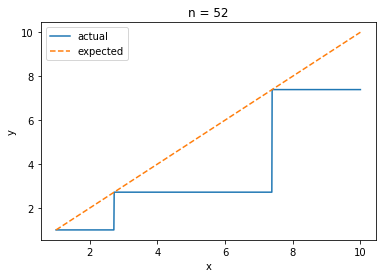

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 2.719
x = 2.7279999999999998
x = 2.737
x = 2.7459999999999996
x = 7.39
x = 7.398999999999999
x = 7.4079999999999995
x = 7.417
x = 7.425999999999999
x = 7.435
x = 7.444


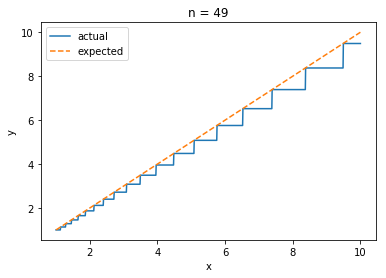

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 1.135
x = 1.144
x = 1.288
x = 1.297
x = 1.306
x = 1.315
x = 1.3239999999999998
x = 1.333
x = 1.342
x = 1.459
x = 1.468
x = 1.4769999999999999
x = 1.486
x = 1.4949999999999999
x = 1.504
x = 1.513
x = 1.5219999999999998
x = 1.531
x = 1.54
x = 1.549
x = 1.8729999999999998
x = 1.882
x = 1.891
x = 1.9
x = 1.9089999999999998
x = 1.918
x = 1.927
x = 1.936
x = 1.9449999999999998
x = 2.125
x = 2.134
x = 2.143
x = 2.404
x = 2.413
x = 2.4219999999999997
x = 2.431
x = 2.44
x = 2.449
x = 2.719
x = 2.7279999999999998
x = 2.737
x = 2.7459999999999996
x = 3.0879999999999996
x = 3.097
x = 3.106
x = 3.1149999999999998
x = 3.1239999999999997
x = 3.133
x = 3.142
x = 3.493
x = 3.502
x = 3.5109999999999997
x = 3.52
x = 3.529
x = 3.538
x = 3.5469999999999997
x = 3.961
x = 3.9699999999999998
x = 3.9789999999999996
x = 3.988
x = 3.997
x = 4.006
x = 4.015
x = 4.023999999999999
x = 4.0329999999999995
x = 4.042
x = 4.483
x = 4.491999999999999
x = 4.500

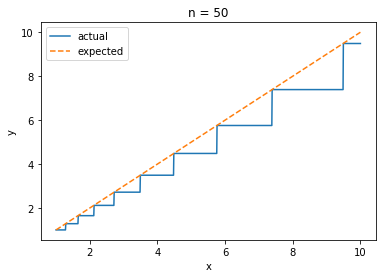

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 1.288
x = 1.297
x = 1.306
x = 1.315
x = 1.3239999999999998
x = 1.333
x = 1.342
x = 2.125
x = 2.134
x = 2.143
x = 2.719
x = 2.7279999999999998
x = 2.737
x = 2.7459999999999996
x = 3.493
x = 3.502
x = 3.5109999999999997
x = 3.52
x = 3.529
x = 3.538
x = 3.5469999999999997
x = 4.483
x = 4.491999999999999
x = 4.5009999999999994
x = 4.51
x = 4.519
x = 4.528
x = 4.537
x = 4.545999999999999
x = 5.760999999999999
x = 5.77
x = 5.779
x = 5.787999999999999
x = 5.797
x = 5.806
x = 5.8149999999999995
x = 5.824
x = 5.832999999999999
x = 5.842
x = 7.39
x = 7.398999999999999
x = 7.4079999999999995
x = 7.417
x = 7.425999999999999
x = 7.435
x = 7.444
x = 9.495999999999999
x = 9.504999999999999
x = 9.514
x = 9.523
x = 9.532
x = 9.540999999999999
x = 9.549999999999999


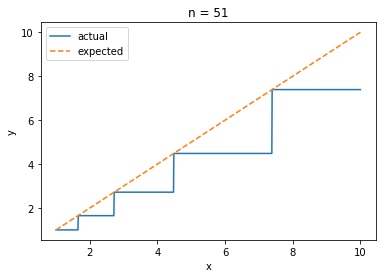

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 2.719
x = 2.7279999999999998
x = 2.737
x = 2.7459999999999996
x = 4.483
x = 4.491999999999999
x = 4.5009999999999994
x = 4.51
x = 4.519
x = 4.528
x = 4.537
x = 4.545999999999999
x = 7.39
x = 7.398999999999999
x = 7.4079999999999995
x = 7.417
x = 7.425999999999999
x = 7.435
x = 7.444


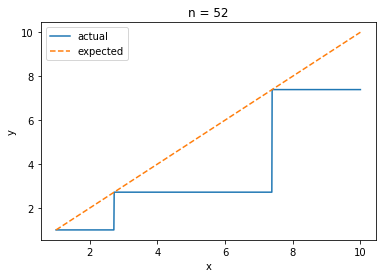

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 2.719
x = 2.7279999999999998
x = 2.737
x = 2.7459999999999996
x = 7.39
x = 7.398999999999999
x = 7.4079999999999995
x = 7.417
x = 7.425999999999999
x = 7.435
x = 7.444


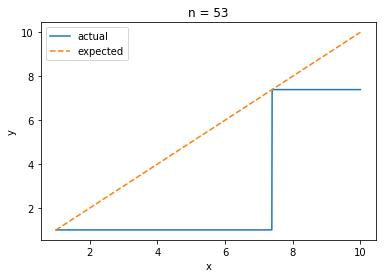

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045
x = 7.39
x = 7.398999999999999
x = 7.4079999999999995
x = 7.417
x = 7.425999999999999
x = 7.435
x = 7.444


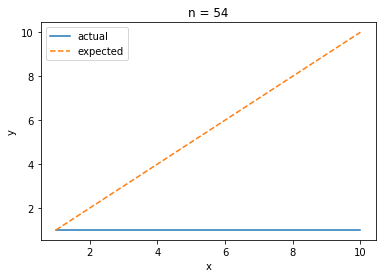

x = 1.0
x = 1.009
x = 1.018
x = 1.027
x = 1.036
x = 1.045


In [123]:
'''
Question 6
'''

def sqrt_root_prob(n):
    x = np.linspace(1.0, 10.0, 1001)
    y = x
    for i in range(n):
        y = np.sqrt(y)

    for i in range(n):
        y = np.square(y)

    plt.plot(x, y, label='actual')
    plt.plot(x, x, '--', label='expected')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('n = %1.1i' % n)
    plt.legend()
    plt.show()
    
    # find values at which the two results are very close
    for i in range(len(x)):
        if (round_sig(x[i], 2) == round_sig(y[i], 2)):
            print('x = ' + str(x[i]))

sqrt_root_prob(52)
            
n = [49, 50, 51, 52, 53, 54]
for i in range(len(n)):
    sqrt_root_prob(n[i])

Looking at the graphs created above from $n = 49$ to $n = 54$, one can see that varying powers of $e$ are left invariant. 

For $n=50$, $x = e^0, e^{0.25}, e^{0.5}, e^{0.75}, e^1, e^{1.25}, e^{1.5}, e^{1.75}, e^2$

For $n=51$, $x = e^0, e^{0.5}, e^1, e^{1.5}, e^2$

For $n=52$, $x = e^0, e^1, e^2$

For $n=53$, $x = e^0, e^2$

For $n=54$, $x = e^0$

(and the trend continues for decreasing n)

Consider the case of square-rooting n times, and then squaring $n$ times for $1+d$. The expression is:

$(1+d)^{1/2n}$ upon the square-rooting, and if d is small, then expanding up to first order: $(1+\frac{d}{2n})$. Now squaring n times yields the following:

$(1+\frac{d}{2n})^{2n}$, where one notes that this is equivalent to the limit in question 5 (if re-defining $n = 2n$). Thus it becomes obvious as to why powers of $e$ remain invariant, while the power of $2n$ explains the pattern as n decreases.

In [118]:
'''
Question 7
'''
x = symbols('x')
w = poly(expand(x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)*(x-7)*(x-8)*(x-9)*(x-10)
             *(x-11)*(x-12)*(x-13)*(x-14)*(x-15)*(x-16)*(x-17)*(x-18)*(x-19)*(x-20))
w_coeff = [float(i) for i in w.coeffs()]
print(w_coeff)

func = np.poly1d(w_coeff)
root = newton(func, 21, maxiter=100000)
print(root)

[1.0, -210.0, 20615.0, -1256850.0, 53327946.0, -1672280820.0, 40171771630.0, -756111184500.0, 11310276995381.0, -135585182899530.0, 1307535010540395.0, -1.014229986551145e+16, 6.30308120992949e+16, -3.113336431613906e+17, 1.2066478037803732e+18, -3.599979517947607e+18, 8.037811822645051e+18, -1.2870931245150988e+19, 1.3803759753640704e+19, -8.7529480367616e+18, 2.43290200817664e+18]
19.999995299528948


In [119]:
delta = [10**-8, 10**-6, 10**-4, 10**-2]
for i in range(len(delta)):
    w_coeff[0] = 1 + delta[i]
    func = np.poly1d(w_coeff)
    root = newton(func, 21, maxiter=100000)
    root2 = np.roots(w_coeff)[0]
    print('delta = '+str(delta[i])+', Newton = '+str(root)+' built-in method = '+str(root2))
    
'''
The largest root has become complex.

Question 7d)
'''

w_coeff[0] = 1.0; w_coeff[1] =  -210.0 - 2**-23
func = np.poly1d(w_coeff)
root = np.roots(w_coeff)
print(root)
'''
Roots 16 and 17 have become complex
'''

delta = 1e-08, Newton = 9.585096282380398 built-in method = (20.647582887998496+1.1869261883090942j)
delta = 1e-06, Newton = 7.752680775461009 built-in method = (23.149016036506442+2.7409846339100326j)
delta = 0.0001, Newton = 5.96933350652477 built-in method = (28.40021241591655+6.5104342165628175j)
delta = 0.01, Newton = 5.469592499488973 built-in method = (38.478183617151515+20.83432358712749j)
[20.84691022+0.j         19.50244237+1.94033198j 19.50244237-1.94033198j
 16.73074489+2.8126249j  16.73074489-2.8126249j  13.99240671+2.51882444j
 13.99240671-2.51882444j 11.79389066+1.6524772j  11.79389066-1.6524772j
 10.09545572+0.64493332j 10.09545572-0.64493332j  8.91581574+0.j
  8.00777232+0.j          6.99960199+0.j          6.00002049+0.j
  4.99999857+0.j          4.00000009+0.j          3.        +0.j
  2.        +0.j          1.        +0.j        ]


'\nRoots 16 and 17 have become complex\n'

In [120]:
'''
Question 7e
'''
summation = 0
r = [14, 16, 17, 20]
for i in range(len(r)):
    p = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)*(x-7)*(x-8)*(x-9)*(x-10)*(x-11)*(x-12)*(x-13)*(x-14)*(x-15)*(x-16)*(x-17)*(x-18)*(x-19)*(x-20)
    p1 = p / (x-r[i])
    for j in range(20):
        summation += r[i]**(j-1)*w.coeffs()[20-j]
        
    cond_num = summation/ p1.subs(x,r[i])
    print(str(r[i])+ ' condition number = '+str(cond_num))

14 condition number = -1332968434.15133
16 condition number = -2597938041.76567
17 condition number = 2553886655.70120
20 condition number = -45735394.0657804


In [121]:
'''
Question 8d:
'''

n = 20
y1 = 0
for i in range(32, n, -1):
    y1 = (math.e - y1) / i

def integral(x):
    return x**n * math.exp(x)

print(y1)
print('quad function = '+str(quad(integral, 0, 1)[0]))

0.12380383076256993
quad function = 0.12380383076256998
